<a href="https://colab.research.google.com/github/harsha-bsm/LDA-on-REDMI-NOTE8-reviews-in-FLIPKART/blob/master/text_Preprocessing_Redmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import numpy
import pandas as pd

In [276]:
data=pd.read_csv("data.csv")

In [277]:
data.head()

,Unnamed: 0,user,title,review,Model,time_of_review,rating,user_address,user_type
0,0,Santosh Thapa,Worth the money,This photo is awesome and little bit value for...,Redmi Note 8 Neptune Blue 64 Gb Reviews: Lates...,27days ago,4,Nainital,Certified Buyer
1,1,Bobita Haarika,Fabulous!,"Smooth performance ,nice camera ,value for mon...",Redmi Note 8 Neptune Blue 64 Gb Reviews: Lates...,5months ago,5,Dergaon,Certified Buyer
2,2,Priti Ghosh,Just wow!,"its amazing phone ...value for money , superb ...",Redmi Note 8 Neptune Blue 64 Gb Reviews: Lates...,2months ago,5,Katwa,Certified Buyer
3,3,vishnu jith,Classy product,in this amount nice Mobile camara pakka better...,Redmi Note 8 Neptune Blue 64 Gb Reviews: Lates...,7months ago,5,Enkakkad,Certified Buyer
4,4,Pramukh Pandey,Highly recommended,i give 💯 to the looks ...its just awesome and ...,Redmi Note 8 Neptune Blue 64 Gb Reviews: Lates...,8months ago,5,Gorakhpur,Certified Buyer


In [278]:
#!pip install emot 

In [279]:
####### Apply emoticons and emojis

from emot.emo_unicode import UNICODE_EMO, EMOTICONS # contains english text of emojis and emoticons in dict format 
def convert_emojis(review):
  for x in review:
    if x in UNICODE_EMO.keys():
      review=review.replace(x,"")
  return review

In [280]:
#converting all basic contracted foms  
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [281]:
#removing special characters and tabs ,spaces,new lines etc..
def removecharacters(review):
  review= re.sub('[^A-Za-z0-9]+',' ',review)  #anything exept numbers and alphabets, replace them with space
  review=re.sub(r"\n"," ",review)  #new lines into space
  review=re.sub(r"\t"," ",review)  #tabs into space
  review=re.sub(r"\v"," ",review)  #vertical tab into space
  review=re.sub(r"\s"," ",review)   #all extra spaces into single space
  return review  


In [282]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step
# ignore words like won't, haven't etc.. We have already taken care of them

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves',"not", 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [283]:
data["review"]=data["review"].apply(lambda x:convert_emojis(x))
data["review"]=data["review"].apply(lambda x:x.lower()) 
data["review"]=data["review"].apply(lambda x:decontracted(x))
data["review"]=data["review"].apply(lambda x:removecharacters(x))

In [284]:
data["review"]

0       this photo is awesome and little bit value for...
1       smooth performance nice camera value for money...
2       its amazing phone value for money superb camer...
3       in this amount nice mobile camara pakka better...
4       i give to the looks its just awesome and perfo...
                              ...                        
1159                                           good phone
1160                                            very nice
1161      superb phone in this price range just go for it
1162    ots verry good productthats why i am buying th...
1163                                        nice products
Name: review, Length: 1164, dtype: object

## Title Preprocessing

In [285]:
data["title"]=data["title"].apply(lambda x:convert_emojis(x))
data["title"]=data["title"].apply(lambda x:x.lower()) 
data["title"]=data["title"].apply(lambda x:decontracted(x))
data["title"]=data["title"].apply(lambda x:removecharacters(x))

In [301]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import ldamodel
import gensim.corpora
from sklearn.decomposition import LatentDirichletAllocation

In [320]:
#https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py
def print_top_words(model, feature_names, n_top_words):
  topics_cluster=[]
  for topic_idx, topic in enumerate(model.components_):
      message = "Topic #%d: " % topic_idx
      message += ",".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
      topics_cluster.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
      print(message)
  return topics_cluster

In [321]:
bow=CountVectorizer(stop_words=stopwords,ngram_range=(1,2))
bow_review=bow.fit_transform(data["review"])
df_bow=pd.DataFrame(bow_review.toarray(),columns=bow.get_feature_names())
lda = LatentDirichletAllocation(n_components=10,random_state=0)
lda.fit_transform(df_bow)
print_top_words(lda,bow.get_feature_names(),6)

Topic #0: awesome,bad,product,osm,looks,perfect
Topic #1: nice,phone,nice phone,mobile,nice mobile,camera
Topic #2: super,money,value,value money,mobile,good
Topic #3: phone,best,camera,mobile,xcellent,price
Topic #4: price,phone,thank,price range,range,flipkart
Topic #5: phone,good,mobile,superb,awesome,good mobile
Topic #6: good,product,good product,quality,camera,battery
Topic #7: good,phone,good phone,product,awesome,love
Topic #8: product,nice,nice product,wesome,great,mobile
Topic #9: phone,price,product,best,mobile,good


[['awesome', 'bad', 'product', 'osm', 'looks', 'perfect'],
 ['nice', 'phone', 'nice phone', 'mobile', 'nice mobile', 'camera'],
 ['super', 'money', 'value', 'value money', 'mobile', 'good'],
 ['phone', 'best', 'camera', 'mobile', 'xcellent', 'price'],
 ['price', 'phone', 'thank', 'price range', 'range', 'flipkart'],
 ['phone', 'good', 'mobile', 'superb', 'awesome', 'good mobile'],
 ['good', 'product', 'good product', 'quality', 'camera', 'battery'],
 ['good', 'phone', 'good phone', 'product', 'awesome', 'love'],
 ['product', 'nice', 'nice product', 'wesome', 'great', 'mobile'],
 ['phone', 'price', 'product', 'best', 'mobile', 'good']]

In [292]:
df_bow

,000rupes,10,10 buying,10 days,10 hur,10 miui,1000,1000 costier,10000,10000 11000,10k,10k 12k,10k best,10k great,10k seem,11,11 5k,11 updatesturdy,11000,11000 bt,11000 market,11000 week,12k,12k buy,13000,13000 sosad,13000rs,13999,13999 avaible,13999 price,13k,13k coz,14000,20,20 000rupes,20 two,2000,2000 extra,42,42 43,...,worst,worst ekart,worst experience,worst performance,worth,worth buy,worth buying,worth money,worth product,worth purchase,worthy,worthy 12k,would,would reffer,wow,wow gajab,wow nice,wow super,wsam,wsm,wsm mobile,wsm product,wsmmm,wsmmm product,wsome,wsome quality,xcellent,xcellent handset,xcellent mobile,xcellent one,xcellent phone,xcellent product,xelent,xperience,xperience super,xtremely,xtremely disappointed,zero,zm,zm product
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [300]:
print_top_words(lda,bow.get_feature_names(),6)

Topic #0: awesome,bad,product,osm,looks,perfect
Topic #1: nice,phone,nice phone,mobile,nice mobile,camera
Topic #2: super,money,value,value money,mobile,good
Topic #3: phone,best,camera,mobile,xcellent,price
Topic #4: price,phone,thank,price range,range,flipkart
Topic #5: phone,good,mobile,superb,awesome,good mobile
Topic #6: good,product,good product,quality,camera,battery
Topic #7: good,phone,good phone,product,awesome,love
Topic #8: product,nice,nice product,wesome,great,mobile
Topic #9: phone,price,product,best,mobile,good



In [327]:
tfidf=TfidfVectorizer(ngram_range=(1,3))
tfidf_words=tfidf.fit_transform(data["review"])

In [328]:
tfidf_words.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [329]:
words=tfidf.get_feature_names()


In [332]:

df_bow=pd.DataFrame(tfidf_words.toarray(),columns=words)
lda = LatentDirichletAllocation(n_components=15,random_state=0)
lda.fit_transform(tfidf_words)
print_top_words(lda,words,10)

Topic #0: wesome product,god,super product,but ok,perfect camera,good phn,product,phn,wonderful purchase,wesome
Topic #1: and,it,verygood,niec,camera,is,nice,phone,camera super,battery backup
Topic #2: mobile,nice mobile,nice,good mobile,good,very,very nice mobile,very nice,very good mobile,too good
Topic #3: wesome,ok,best,perfect,best mobile,wesome phone,mobile,product,phone,gud
Topic #4: nice product,product,nice,bad,not bad,phone,not,nice performance,is,performance
Topic #5: nice,nice phone,very nice,phone,very,nyc,very nice phone,very nice product,best phone,best
Topic #6: super,product,sm,is,awesome,product is,this,this product is,this product,phone
Topic #7: awesome,of,products,good,performance,good performance,very good phone,of money,is,nice products
Topic #8: value,for money,money,value for,value for money,for,camera,excellent,is,performance
Topic #9: xcellent,superb,phone,xcellent product,product,superb phone,is,good,looking,price
Topic #10: worth,phone,it,worth it,love,is,a

[['wesome product',
  'god',
  'super product',
  'but ok',
  'perfect camera',
  'good phn',
  'product',
  'phn',
  'wonderful purchase',
  'wesome'],
 ['and',
  'it',
  'verygood',
  'niec',
  'camera',
  'is',
  'nice',
  'phone',
  'camera super',
  'battery backup'],
 ['mobile',
  'nice mobile',
  'nice',
  'good mobile',
  'good',
  'very',
  'very nice mobile',
  'very nice',
  'very good mobile',
  'too good'],
 ['wesome',
  'ok',
  'best',
  'perfect',
  'best mobile',
  'wesome phone',
  'mobile',
  'product',
  'phone',
  'gud'],
 ['nice product',
  'product',
  'nice',
  'bad',
  'not bad',
  'phone',
  'not',
  'nice performance',
  'is',
  'performance'],
 ['nice',
  'nice phone',
  'very nice',
  'phone',
  'very',
  'nyc',
  'very nice phone',
  'very nice product',
  'best phone',
  'best'],
 ['super',
  'product',
  'sm',
  'is',
  'awesome',
  'product is',
  'this',
  'this product is',
  'this product',
  'phone'],
 ['awesome',
  'of',
  'products',
  'good',
  'p

In [335]:
stopwords=set(STOPWORDS) # getting the stopping words\
# Generating a Wordcloud object
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
             
                min_font_size = 10).generate(words) 

In [334]:
words=" ".join(print_top_words(lda,words,10)[0])

Topic #0: wesome product,god,super product,but ok,perfect camera,good phn,product,phn,wonderful purchase,wesome
Topic #1: and,it,verygood,niec,camera,is,nice,phone,camera super,battery backup
Topic #2: mobile,nice mobile,nice,good mobile,good,very,very nice mobile,very nice,very good mobile,too good
Topic #3: wesome,ok,best,perfect,best mobile,wesome phone,mobile,product,phone,gud
Topic #4: nice product,product,nice,bad,not bad,phone,not,nice performance,is,performance
Topic #5: nice,nice phone,very nice,phone,very,nyc,very nice phone,very nice product,best phone,best
Topic #6: super,product,sm,is,awesome,product is,this,this product is,this product,phone
Topic #7: awesome,of,products,good,performance,good performance,very good phone,of money,is,nice products
Topic #8: value,for money,money,value for,value for money,for,camera,excellent,is,performance
Topic #9: xcellent,superb,phone,xcellent product,product,superb phone,is,good,looking,price
Topic #10: worth,phone,it,worth it,love,is,a

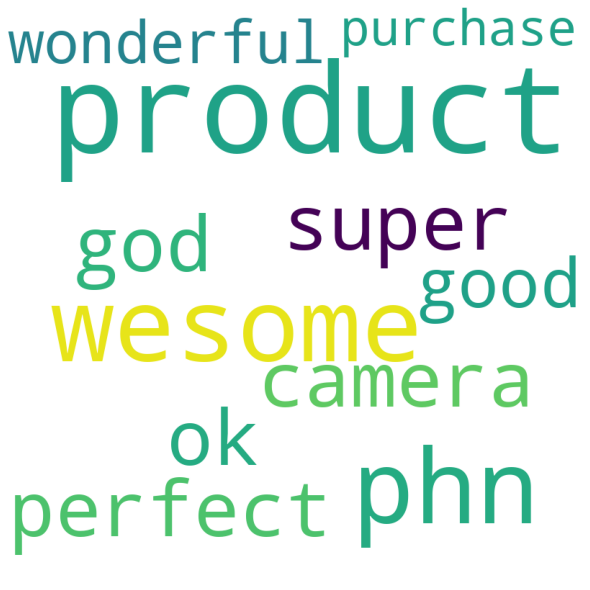

In [336]:
# Plotting the WordCloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 